In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("data/day9", skip_blank_lines=True,sep=" ",header=None)
df.columns = ["move","qtty"]
df.qtty = df.qtty.astype(int)
df.move = df.move.apply(lambda 
                        x: str(x).strip())
df.head(7)

,move,qtty
0,R,1
1,D,1
2,L,1
3,D,1
4,R,2
5,L,1
6,U,2


In [332]:
X = [0]
Y = [0]
for ix, row in df.iterrows():

    if row.move == "R":
        #print("R")
        X.append(X[-1] + row.qtty)
    elif row.move == "L":
        X.append(X[-1] - row.qtty)
    elif row.move == "U":
        Y.append(Y[-1] + row.qtty)
    elif row.move == "D":
        Y.append(Y[-1] - row.qtty)
        
sz = (max(np.abs([min(X),max(X),min(Y),max(Y)])) + 10)* 2

In [205]:
updateT([[2,1],[2,0]],[[3,1]])

fail


[[3, 1], [3, 1]]

In [333]:
def updateT(trackH,trackT):
    if len(trackT) == 0:
        trackT.append(trackH[-2])
        return trackT
    else:

        [X, Y] = trackH[-1]
        [x, y] = trackT[-1]
        [xprev, yprev] = trackH[-2]
        
        if ((np.abs((X-x)) == 2) and (y == Y)) or ((np.abs((Y-y)) == 2) and (x == X)) :
            trackT.append([xprev,yprev])
            return trackT
        elif ((np.abs((X-x)) == 2) and (np.abs((Y-y)) == 1)):
            y = Y
            x = x+(X-x)//2
            trackT.append([x,y])
            return trackT     
        elif ((np.abs((Y-y)) == 2) and (np.abs((X-x)) == 1)):
            x = X
            y = y+(Y-y)//2
            trackT.append([x,y])
            return trackT           
        else:
            trackT.append([x,y])  # does not move
            return trackT
        
    return False

In [341]:

H = np.zeros((sz,sz))
T = np.zeros((sz,sz))

x,y = sz//2,sz//2

H[x][y] += 1
trackH = [[x,y]]
trackT = []
for ix, row in df.iterrows():
    for n in range(int(row.qtty)):
        if row.move == "R":
            x += 1
            H[x][y] += 1
        elif row.move == "L":
            x -= 1
            H[x][y] += 1
        elif row.move == "U":
            y += 1
            H[x][y] += 1
        elif row.move == "D":
            y -= 1
            H[x][y] += 1
        trackH.append([x,y])
         
        trackT = updateT(trackH,trackT)
        PREV = trackT[-1]
        T[PREV[0]][PREV[1]] += 1
savedStateT0 = trackT


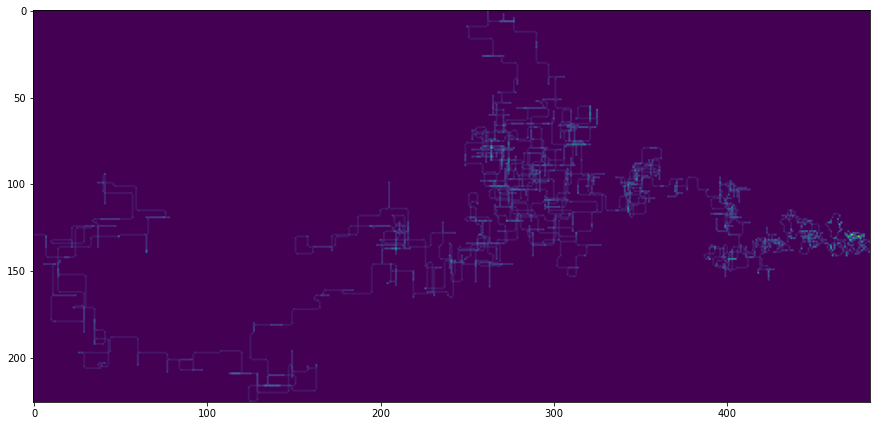

In [342]:
r = T
r = r[~np.all(r == 0, axis=1)]
r = np.rot90(r)
r = r[~np.all(r == 0, axis=1)]
r = np.rot90(r,k=-1)
plt.figure(figsize = (15,15))
plt.imshow(r)

In [343]:
np.count_nonzero(T)  

5874

In [344]:
def updateTbis(trackH,trackT):
    if len(trackT) == 0:
        trackT.append(trackH[-1])
        return trackT
    else:

        [X, Y] = trackH[-1]
        [x, y] = trackT[-1]
        [xprev, yprev] = trackH[-2]
        
        if ((np.abs((X-x)) == 2) and (y == Y)) or ((np.abs((Y-y)) == 2) and (x == X)) :
            trackT.append([xprev,yprev])
            return trackT
        elif ((np.abs((X-x)) == 2) and (np.abs((Y-y)) == 1)):
            y = Y
            x = x+(X-x)//2
            trackT.append([x,y])
            return trackT     
        elif ((np.abs((Y-y)) == 2) and (np.abs((X-x)) == 1)):
            x = X
            y = y+(Y-y)//2
            trackT.append([x,y])
            return trackT
        # New case
        elif ((np.abs((Y-y)) == 2) and (np.abs((X-x)) == 2)): 
            x = x+(X-x)//2
            y = y+(Y-y)//2
            trackT.append([x,y])
            return trackT
        else:
            trackT.append([x,y])  # does not move
            return trackT
        
    return False

Maillon n2
[573 493] [348  11]
11277
Maillon n3
[573 493] [349  14]


C:\Users\JON80843\AppData\Local\Temp/ipykernel_4704/879862928.py:25: RuntimeWarning: invalid value encountered in floor_divide
  plt.imshow(r//r)


11275
Maillon n4
[573 492] [350  16]
11273
Maillon n5
[572 492] [351  17]
11271
Maillon n6
[571 492] [351  18]
11269
Maillon n7
[570 491] [351  18]
11267
Maillon n8
[569 490] [351  19]
11265
Maillon n9
[568 490] [351  20]
11263


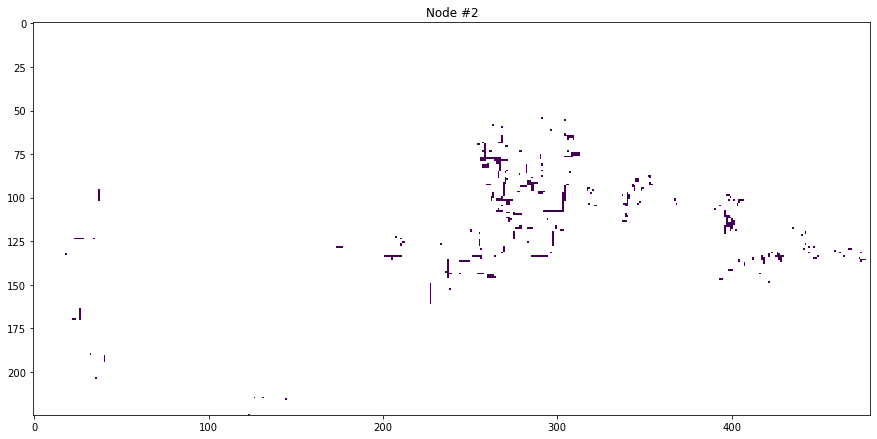

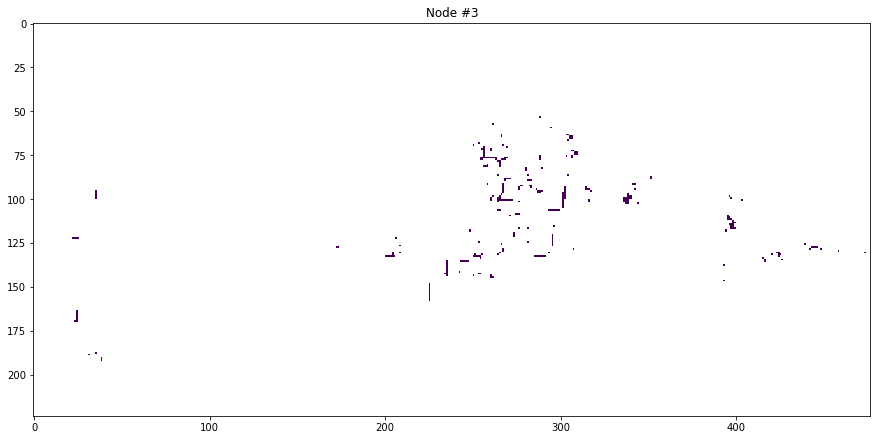

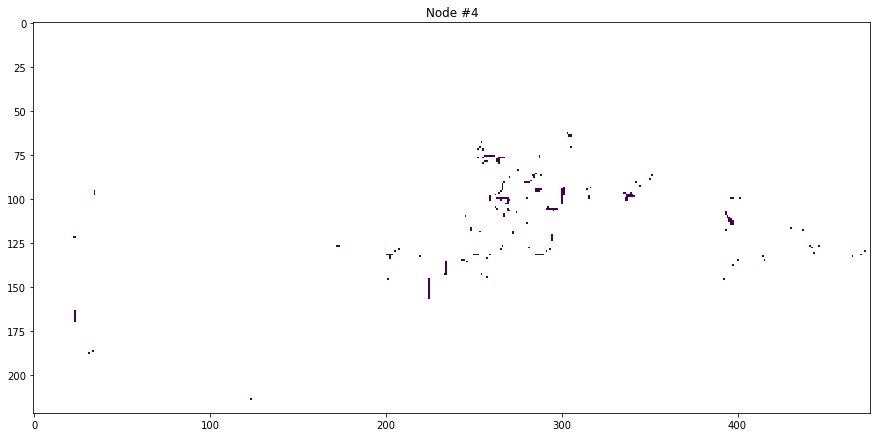

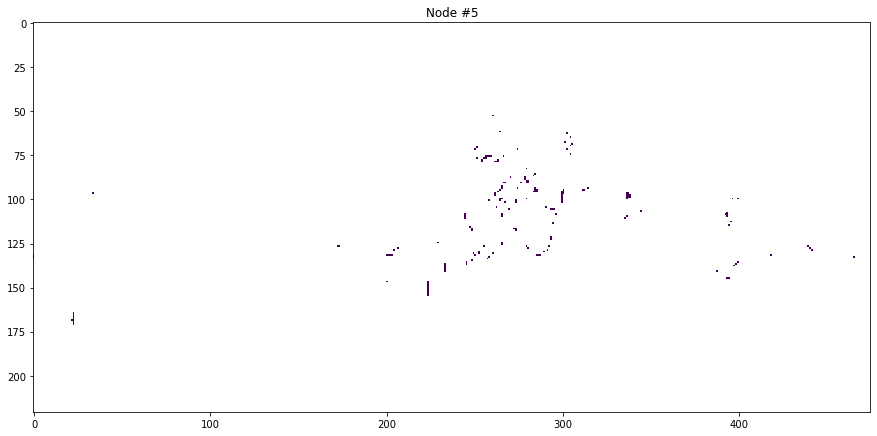

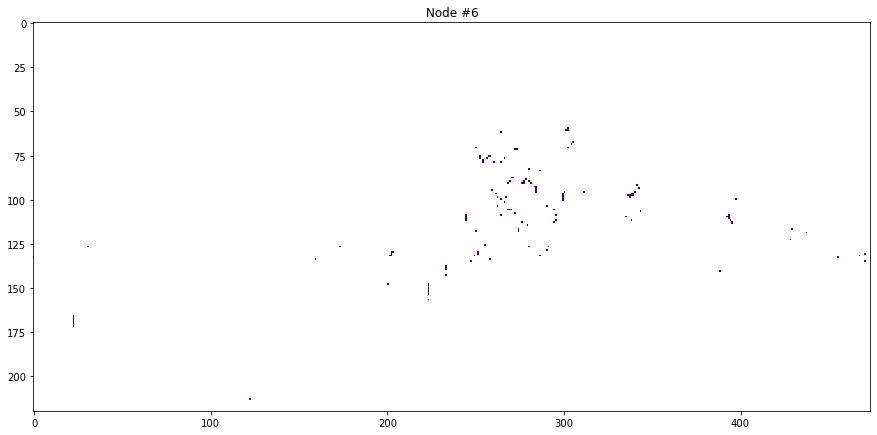

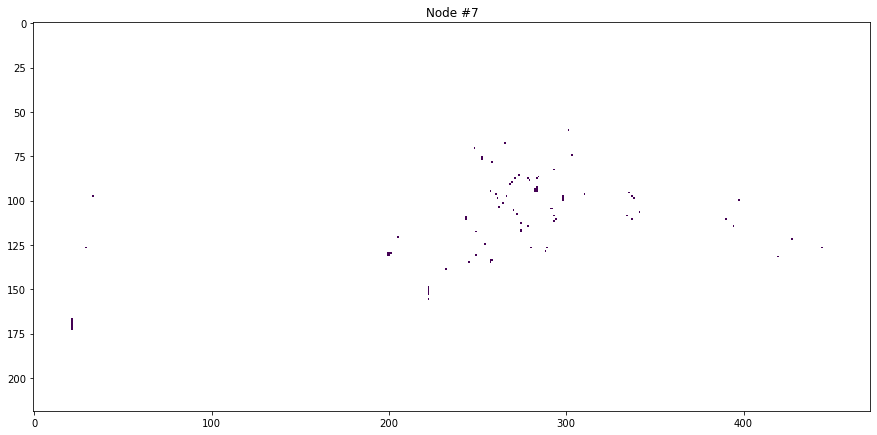

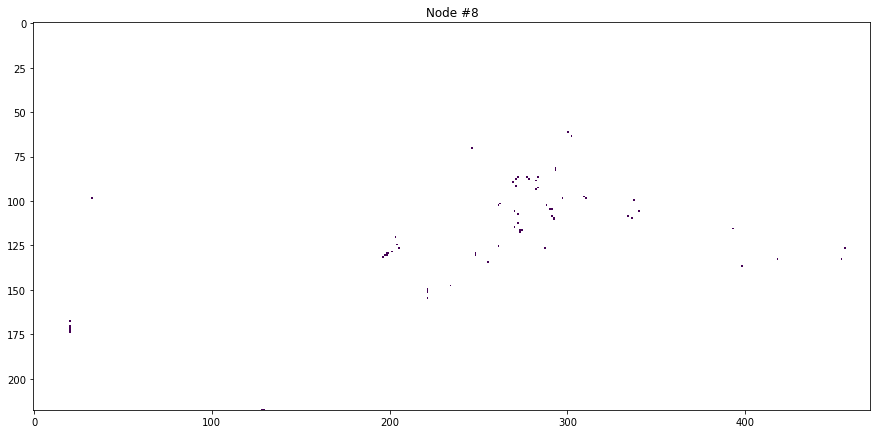

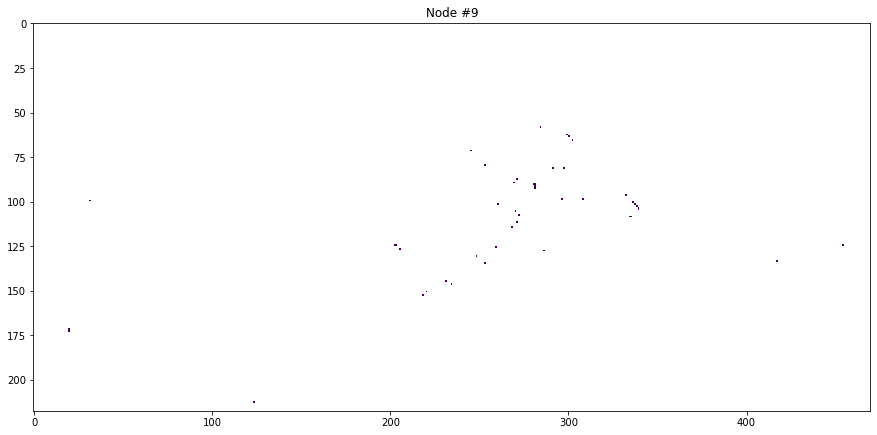

In [366]:
trackH = savedStateT0
for k in range(8):
    print("Maillon n"+str(k+2))
    trackT = []
    tmp = np.array(trackH)
    print(np.max(tmp,axis=0),np.min(tmp,axis=0))
    for horizon in range(len(trackH)-2):
        trackT = updateTbis(trackH[:horizon+1],trackT) 
    print(len(trackT))
    trackH = trackT
    

    H = np.zeros((sz,sz))
    for ix in trackT:
        H[ix[0]][ix[1]] += 1
        
    r = H
    r = r[~np.all(r == 0, axis=1)]
    r = np.rot90(r)
    r = r[~np.all(r == 0, axis=1)]
    r = np.rot90(r,k=-1)
    plt.figure(figsize = (15,15))
    TITRE = "Node #"+str(k+2)
    plt.title(TITRE)
    plt.imshow(r//r)

In [367]:
np.count_nonzero(H)  # 2543 too high, 2357 too low

2543